# 图像几何变换
几何变换：旋转、平移、缩放和翻转图片。

## 目标
* 实现旋转、平移和缩放图片
* 函数：cv2.resize(),cv2.flip(),cv2.warpAffine()
```
cv2.resize()缩放图片，可以按指定大小缩放，也可以按比例缩放。
cv2.flip()翻转图片，可以指定水平/垂直/水平垂直翻转三种方式。
平移/旋转是靠仿射变换cv2.warpAffine()实现的。
```

## 正文
图像的集合变换从原理上主要包含两种：基于2x3矩阵的仿射变换(平移、缩放、旋转和翻转等)、基于3x3矩阵的透视变换。

### 缩放图片
* 缩放，即调整图片的大小,函数cv2.resize()来实现，可以按照比例来缩放，也可以指定大小来缩放。

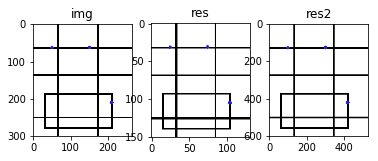

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img=cv2.imread('drawing.jpg')

#按照指定的大小进行缩放

res=cv2.resize(img,(130,150))
#按照比例来缩放，如x,y都放大一倍
res2=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_LINEAR)
plt.subplot(131)
plt.imshow(img)
plt.title('img')
plt.subplot(132)
plt.imshow(res)
plt.title('res')
plt.subplot(133)
plt.imshow(res2)
plt.title('res2')
plt.show()

参数：
```
参数1：原始图片
参数2：缩放的指定大小
参数3：x放大倍数
参数4：y放大倍数
参数5：interpolation缩放方法(插值方法)，默认为INTER_LINEAR线性插值
```
interpolation全部参考：[interpolation](https://docs.opencv.org/3.3.1/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

### 翻转图片
* cv2.flip()实现镜像翻转图片。

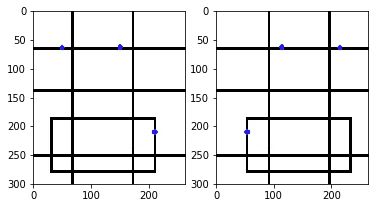

In [6]:
dst=cv2.flip(img,1)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

参数：
```
参数1：原始图片
参数2：0:沿着x轴垂直翻转，>0：沿y轴水平翻转，<0：水平垂直翻转。
```

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547086335093_QgcMxIMV45.jpg)

### 平移图片
平移图片，需要定义一个矩阵，tx，ty是向x，y方向平移的距离：
$$M=
\left[
 \begin{matrix}
   1 & 0 & t_x \\
   0 & 1 & t_y
  \end{matrix} 
  \right]
$$

平移是使用仿射变换函数cv2.warpAffine()实现的。

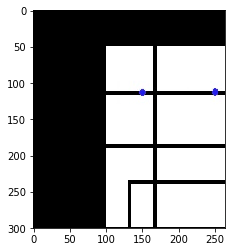

In [8]:
import numpy as np

rows,cols=img.shape[:2]
#定义平移矩阵,需要是numpy的float32类型
#x轴的平移为100，y轴的平移为50
M=np.array([[1,0,100],[0,1,50]],dtype=np.float32)

dst=cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.show()

### 旋转图片
旋转也是用仿射变换实现的，也要定义一个变换矩阵，opencv提供了cv2.getRotationMatrix2D()函数来生成这个矩阵，该函数的参数为：

* 参数1：图片的旋转中心
* 参数2：旋转角度(正：逆时针，负：顺时针)
* 参数3：缩放比例，0.5表示缩小一半。

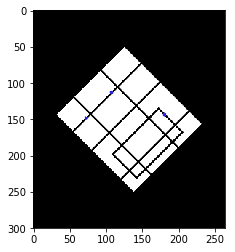

In [9]:
M=cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)
dst=cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.show()